In [16]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [6]:
first_df = pd.read_csv("../Final_Results/PMLBR/2025-03-28_19_57_FIRST_FINAL/FIRST_result.csv")
second_df = pd.read_csv("FINAL_RUNS/2025-03-20_21_24_SECOND/SECOND_result.csv")
third_df = pd.read_csv("FINAL_RUNS/2025-03-17_19_43_THIRD/THIRD_result.csv")
fourth_df = pd.read_csv("FINAL_RUNS/2025-03-24_10_54_FOURTH/FOURTH_result.csv")

In [7]:
print(first_df.columns)

Index(['Data', 'n', 'p', 'Experiment', 'Run', 'Correlation', 'MAE', 'RMSE',
       'LMP', 'R2', 'Count_P', 'Time', 'First', 'Second', 'Third', 'FirstM',
       'SecondM', 'ThirdM'],
      dtype='object')


In [30]:
print(first_df["MAE"].median())
print(second_df["MAE"].median())
print(third_df["MAE"].median())
print(fourth_df["MAE"].median())

0.07183095426063829
0.0713628917861798
0.0719041888787679
0.0716627552787431


In [45]:
dfs = [first_df, second_df, third_df, fourth_df]
df_names = ["First", "Second", "Third", "Fourth"]

# Loop through each DataFrame
for name, df in zip(df_names, dfs):
    extreme_values = df.loc[df["MAE"] > 100, "Data"].unique()
    print(f"{name} Dataset:")
    print(extreme_values)
    print("-" * 40)  # Separator for readability

First Dataset:
['auto_insurance_losses' '607_fri_c4_1000_50' 'strogatz_bacres2'
 'strogatz_bacres1' 'strogatz_barmag1' '560_bodyfat' 'strogatz_glider2'
 'strogatz_shearflow2' '643_fri_c2_500_25']
----------------------------------------
Second Dataset:
['560_bodyfat' '607_fri_c4_1000_50' '643_fri_c2_500_25'
 'auto_insurance_losses' 'strogatz_bacres1' 'strogatz_bacres2'
 'strogatz_barmag1' 'strogatz_glider2' 'strogatz_shearflow2']
----------------------------------------
Third Dataset:
['197_cpu_act' '_deprecated_195_auto_price' 'strogatz_barmag1'
 'strogatz_glider2' 'auto_insurance_losses' 'strogatz_shearflow2'
 'auto_insurance_price' '584_fri_c4_500_25' '573_cpu_act' '505_tecator'
 '582_fri_c1_500_25' '581_fri_c3_500_25']
----------------------------------------
Fourth Dataset:
['auto_insurance_losses' 'strogatz_glider2' 'strogatz_shearflow2'
 'strogatz_barmag1' '197_cpu_act' '573_cpu_act' 'auto_insurance_price'
 '581_fri_c3_500_25' '505_tecator' '582_fri_c1_500_25'
 '_deprecated_195_

In [60]:
# Assuming df1, df2, df3, df4 are your dataframes
# Combine all four dataframes
first_df['Dataset'] = 'First'
second_df['Dataset'] = 'Second'
third_df['Dataset'] = 'Third'
fourth_df['Dataset'] = 'Fourth'
combined_df = pd.concat([first_df, second_df, third_df, fourth_df], ignore_index=True)

# Filter the rows where MAE > 1
filtered_df = combined_df[combined_df['MAE'] > 1]

# Count how many times each Data value appears in the filtered rows
data_counts = filtered_df.groupby('Dataset')['Data'].value_counts()

# Print the counts
first_dataset_counts = data_counts['First']
second_dataset_counts = data_counts['Second']
third_dataset_counts = data_counts['Third']
fourth_dataset_counts = data_counts['Fourth']

# Combine them into a single DataFrame
combined_counts = pd.concat([first_dataset_counts, second_dataset_counts, third_dataset_counts, fourth_dataset_counts], axis=1)

# Rename the columns for clarity
combined_counts.columns = ['First', 'Second', 'Third', 'Fourth']

# Print the combined counts
print(combined_counts)


                            First  Second  Third  Fourth
Data                                                    
strogatz_barmag1             10.0    10.0   10.0    10.0
197_cpu_act                   8.0    10.0   10.0    10.0
573_cpu_act                   8.0     8.0   10.0    10.0
505_tecator                   7.0     7.0    6.0     6.0
auto_insurance_losses         5.0     5.0    6.0     6.0
strogatz_bacres2              5.0     5.0    1.0     1.0
auto_insurance_price          4.0     4.0    5.0     5.0
strogatz_shearflow1           4.0     4.0    4.0     4.0
560_bodyfat                   3.0     3.0    NaN     NaN
strogatz_bacres1              3.0     3.0    1.0     1.0
strogatz_glider2              3.0     3.0    5.0     5.0
strogatz_barmag2              2.0     2.0    7.0     7.0
strogatz_predprey2            2.0     2.0    NaN     NaN
strogatz_vdp1                 2.0     2.0    NaN     NaN
201_pol                       1.0     1.0    NaN     NaN
607_fri_c4_1000_50            1

In [73]:
first_df = first_df[first_df["MAE"]<0.5]
second_df = second_df[second_df["MAE"]<0.5]
third_df = third_df[third_df["MAE"]<0.5]
fourth_df = fourth_df[fourth_df["MAE"]<0.5]

In [102]:
# Function to make splits for boxplots or other plots
def split_df(df, name, column, value):
    df_below = df[df[column] < value].copy()
    df_above = df[df[column] >= value].copy()
    df_below["Group"] = "Small"
    df_above["Group"] = "Large"
    df_below["Exp"] = name
    df_above["Exp"] = name
    return df_below, df_above

<Figure size 1000x500 with 0 Axes>

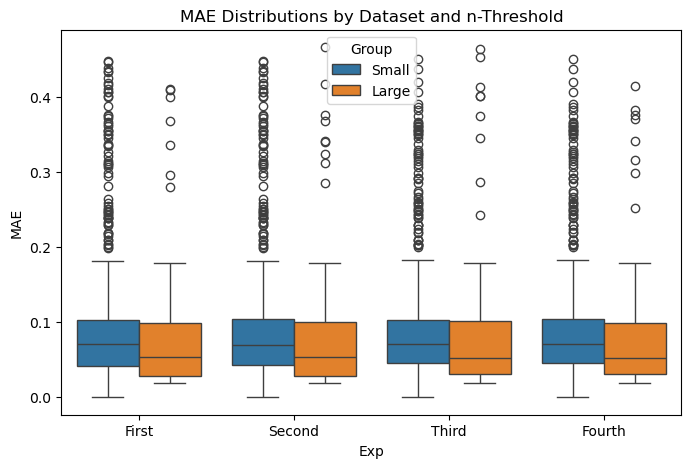

In [109]:
# Define split settings
split_column = "n"
split_value = 1000
dfs = []
names = ["First", "Second", "Third", "Fourth"]
for i, df in enumerate([first_df, second_df, third_df, fourth_df]):
    below, above = split_df(df, names[i], split_column, split_value)
    dfs.extend([below, above])

# Combine all
df_all = pd.concat(dfs)

# Create the boxplot
plt.figure(figsize=(10, 5))
# Define color mapping based on "Group" values


# Create boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Exp", y="MAE", hue = "Group")

# Rotate x-axis labels for readability
plt.title("MAE Distributions by Dataset and n-Threshold")
plt.show()